# Jacobi COnstant and Zero Velocity Curve
## Given:
Earth-Moon System in a 3BCRP, assume positon and velocity:
$$\vec{r} = -0.27 \hat{x} - 0.42 \hat{y}$$
$$\vec{v} = 0.3\hat{x} - 1\hat{y}$$

## Find:
a) Since we know the location of $L_i$, what are the Jacobi constants for them. 

b) What is the Jacobi constant for the given trajectory. Plot the ZVC (Zero velocity curve) for this trajectory.

c) Numerically integrate D.E. for given I.C. Plot in x-y plane:

    i. For 4 revolutions of the large primary. How long does that take in dimensional and non-dimensional? 
    ii. Plot unitil it moves to Lunar vicinity. How long does that take in dimensional and non-dimensional?
    iii. Plot the change of the Jacobi constant over time.
    


In [2]:
# Import Functions and basic infor
import sys
sys.path.append('../')
from Functions.Universe import G
from Functions.Universe import Solar_3 as SS3
from Functions import Keplarian_fnc as kp
from Functions import Poincare_fnc as pn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Given 
system = "Earth-Moon"
r_vec = np.array([-.27, -.42, 0])
v_vec = np.array([.3, 1, 0])


### Part a)

In [4]:
gamma2, L2 = pn.L2_Newton(SS3.loc[system,'miu'],  0.01)
gamma1, L1 = pn.L1_Newton(SS3.loc[system,'miu'],  0.01)
gamma3, L3 = pn.L3_Newton(SS3.loc[system,'miu'],  0.9)

print("Jacobi constant for L_1: ", round(pn.Jacobi_const(L1, 0, 0, 0, SS3.loc[system, 'miu']),5))
print("Jacobi constant for L_2: ", round(pn.Jacobi_const(L2, 0, 0, 0, SS3.loc[system, 'miu']),5))
print("Jacobi constant for L_3: ", round(pn.Jacobi_const(L3, 0, 0, 0, SS3.loc[system, 'miu']),5))




Jacobi constant for L_1:  3.18834
Jacobi constant for L_2:  3.17216
Jacobi constant for L_3:  3.01215


### Part b)

C:\Users\Sushr\AppData\Local\Temp/ipykernel_15484/151569154.py:11: UserWarning: The following kwargs were not used by contour: 'label'
  axs.contour(X,Y, -C, levels = [-C0, -C0+10**-12], colors='black', label='ZVC')


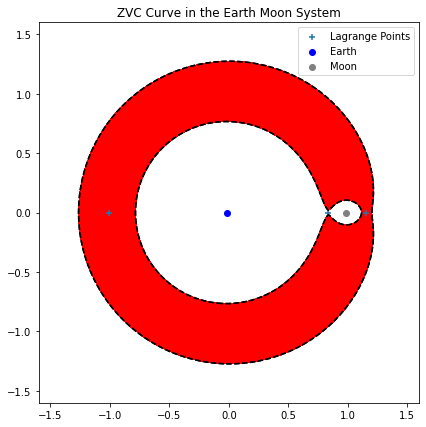

In [5]:
grid = np.linspace(-1.6,1.6,2000)
v = np.linalg.norm(v_vec)

[X, Y] = np.meshgrid(grid, grid)
C = pn.Jacobi_const(X, Y, 0, 0, SS3.loc[system,'miu'])

C0 = pn.Jacobi_const(r_vec[0], r_vec[1], r_vec[2], v, SS3.loc[system,'miu'])

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axs.contourf(X,Y, -C, levels = [-C0, -C0+10**-12], extend = 'max', cmap = 'rainbow')
axs.contour(X,Y, -C, levels = [-C0, -C0+10**-12], colors='black', label='ZVC')
axs.scatter([L1, L2, L3],[0, 0, 0], marker="+", label = 'Lagrange Points')
axs.scatter(-SS3.loc[system, 'miu'],0, marker = 'o', color='blue', label='Earth')
axs.scatter(1-SS3.loc[system, 'miu'],0, marker='o', color='grey', label='Moon')
axs.set_aspect('equal', 'box')
axs.set_title('ZVC Curve in the Earth Moon System')
axs.legend()


### Part c)